# Principal Components Analysis (PCA): dimensionality reduction

## Task 1: Users to Movies

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch
import numpy as np

### Creating data set

In [2]:
# Create the dataset using the np.array() with the data provided above
X = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])

# Storing the number of users
nUsers = X.shape[0]

# Storing the number of movies
nMovies = X.shape[1]

### Visualizing the data set

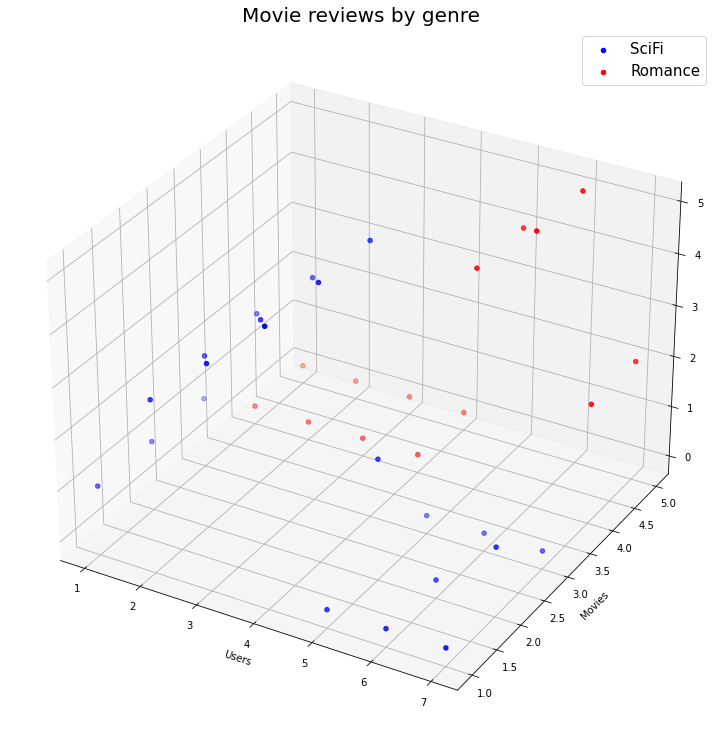

In [3]:
users = np.array([[i]*nMovies for i in range(1, nUsers+1)]).flatten()
movie = np.array([[i] for i in range(1, nMovies+1)]*nUsers).flatten()
reviews = X.flatten()

fig = plt.figure(figsize = (13,13))

fig = plt.axes(projection='3d')

plt.rc('legend',fontsize = 15)

# Plotting the SciFi data 
sciFi = np.where(movie<4)
fig.scatter3D(users[sciFi],movie[sciFi],reviews[sciFi], c = 'b', label = "SciFi")

# Plotting the romance data 
romance = np.where(movie>3)
fig.scatter3D(users[romance],movie[romance],reviews[romance], c = 'r', label = "Romance")

# Adding legend
plt.legend()

# Setting x and y labels
plt.xlabel("Users")
plt.ylabel("Movies")

# Setting title
plt.title("Movie reviews by genre", fontsize = 20)

plt.show()

### Data Pre-processing
Centering the data by subtracting the mean.

In [4]:
X_centered = X-X.mean(axis=0)

### Solution 1: Implementing PCA using Singular Value Decomposition (SVD)

Calculating the U, S, V^T by using the singular value decomposition function from numpy

In [5]:
u, s, v = np.linalg.svd(X_centered)
vT = v.T

Printing the values obtained in the previous step

In [6]:
print("U.shape, S.shape, V.T.shape ->", u.shape, s.shape, vT.shape, end="\n\n")

print("U =",np.around(u, decimals=3), sep="\n", end="\n\n")

print("S =",np.around(s, decimals=3), sep="\n", end="\n\n")

print("V.T =",np.around(vT, decimals=3), sep="\n", end="\n\n")

U.shape, S.shape, V.T.shape -> (7, 7) (5,) (5, 5)

U =
[[ 0.014 -0.691  0.158  0.343 -0.51   0.059 -0.341]
 [ 0.265 -0.142  0.077 -0.059 -0.184 -0.839  0.403]
 [ 0.39   0.133  0.036 -0.596 -0.595  0.329  0.11 ]
 [ 0.516  0.408 -0.004  0.702 -0.158  0.155  0.16 ]
 [-0.388  0.286 -0.686  0.091 -0.47  -0.211 -0.154]
 [-0.546  0.347  0.662  0.099 -0.325 -0.028  0.162]
 [-0.25  -0.34  -0.244  0.115 -0.036  0.339  0.796]]

S =
[10.492  4.09   1.324  0.     0.   ]

V.T =
[[ 0.471  0.356  0.389 -0.038  0.706]
 [ 0.374  0.412 -0.831  0.    -0.   ]
 [ 0.471  0.356  0.389  0.038 -0.706]
 [-0.456  0.537  0.061 -0.706 -0.038]
 [-0.456  0.537  0.061  0.706  0.038]]



#### Plotting the eigenvalues
Calculating and plotting the singlar values for the  D  matrix.

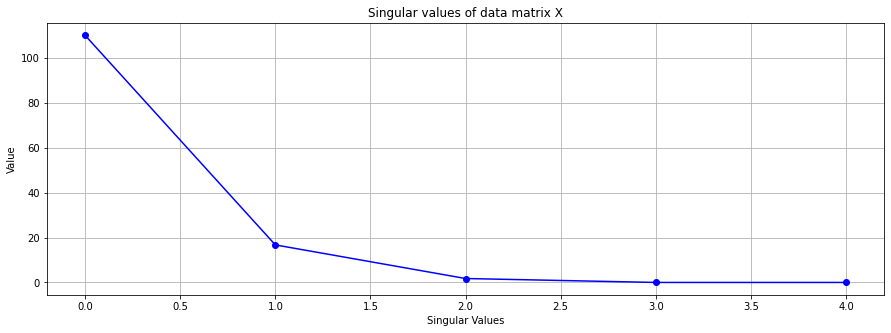

In [7]:
D = s*s

fig_size = (15,5)
plt.figure(figsize = fig_size)
plt.grid()

plt.plot(D,'bo-')
plt.title("Singular values of data matrix X")
plt.xlabel("Singular Values")
plt.ylabel("Value")
plt.show()

#### Compressing the data

Compressing the data using 2 principal components because based on the graph above, 2 components capture the majority of the variance of the data.

In [8]:
c1 = vT[:,0]
c2 = vT[:,1]
W2 = vT[:, :2]

X2D = X_centered.dot(W2)
print(X2D)

[[ 0.14417203 -2.82787396]
 [ 2.7775391  -0.57977689]
 [ 4.09422264  0.54427165]
 [ 5.41090617  1.66832018]
 [-4.07253971  1.16872711]
 [-5.73177463  1.41792961]
 [-2.6225256  -1.3915977 ]]


#### Visualizing the compressed data

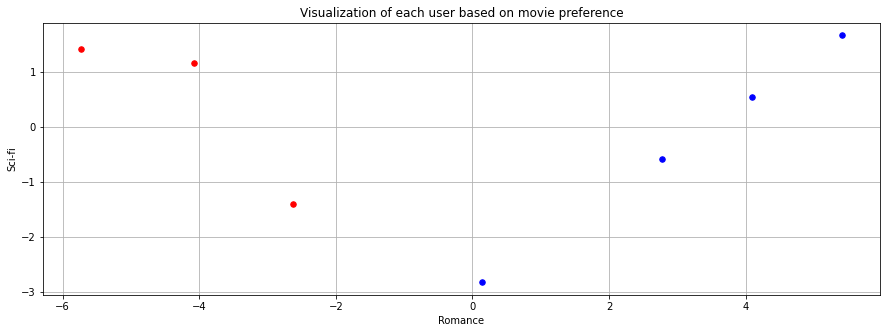

In [9]:
fig_size = (15,5)
plt.figure(figsize = fig_size)
plt.grid()

plt.title("Visualization of each user based on movie preference")
plt.xlabel("Romance")
plt.ylabel("Sci-fi")

romance = np.where(X2D[:,0]>0)
sciFi = np.where(X2D[:,0]<0)

plt.scatter(X2D[romance,0] , X2D[romance,1], s = 30, c = 'b')
plt.scatter(X2D[sciFi,0] , X2D[sciFi,1], s = 30, c = 'r')

plt.show()

### Solution 2: Directly computing the eigenvectors and eigenvalues 

In [10]:
XTX = np.matmul(X_centered.T,X_centered)
eValues, eVectors = np.linalg.eig(XTX)

In [11]:
print("V (Eigen-vectors) = ")
print(np.around(eVectors, decimals=3))
print()
print("diagonal elements of D (Eigen-values) = ")
print(np.around(eValues, decimals=3)) 
print()
print("sqrt(Eigen-values) = ")
print(np.around(np.sqrt(np.abs(eValues)), decimals=3))

V (Eigen-vectors) = 
[[-0.471 -0.356  0.389 -0.009  0.689]
 [-0.374 -0.412 -0.831 -0.     0.   ]
 [-0.471 -0.356  0.389  0.009 -0.689]
 [ 0.456 -0.537  0.061 -0.707 -0.16 ]
 [ 0.456 -0.537  0.061  0.707  0.16 ]]

diagonal elements of D (Eigen-values) = 
[110.093  16.726   1.753  -0.      0.   ]

sqrt(Eigen-values) = 
[10.492  4.09   1.324  0.     0.   ]



1. That the **square-root of the eigen-values** of the covariance matrix $X^TX$ correspond exactly the the **singular values** of the data matrix $X$.
2. The **eigen-vectors** of $X^TX$ are exactly the same as the column vectors in the matrix $V$ when we performed SVD on $X$.

Therefore, the same Princpal components of our data matrix $X$, may be extracted via SVD or from $X$'s convariance matrix.


## Task 2: Human Faces 

Each image is a 62x47 pixel array. The images are read into a matrix called fea. Each row of the matrix fea represents one image (example). The features (columns) are the pixel values. Each example is represented by a vector of real numbers of length 2914, listing the pixels from left to right, row by row, from top to bottom.

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people

### Loading the data set

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person = 70)
nImages = lfw_people.images.shape[0]
h = lfw_people.images.shape[1]
w = lfw_people.images.shape[2]

x  = lfw_people.data

n_pixels = x.shape[1]

### Defining function to plot face

In [3]:
def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])

### Plotting fourth face

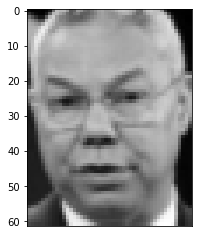

In [4]:
plt_face(x[3])
plt.show()

### Centering the data and plotting the mean image

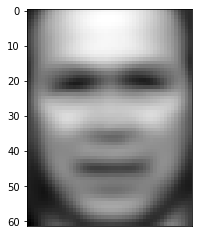

In [5]:
x_mean = x.mean(axis=0)
x_centered = x - x_mean

plt_face(x_mean)
plt.show()

### Implementing PCA by calculating eigenvalues and eigenvectors

In [6]:
xTx = np.matmul(x_centered.T,x_centered)
eigval, eigvec = np.linalg.eig(xTx)

### 5 Principal Components

Extracting the top 5 principal components and printing the values attributed with them. Then projecting the data onto the 5 principal components.

In [7]:
top5=np.argsort(eigval)[::-1][:5]

eigvec5=eigvec[:,top5]

eigval5=eigval[top5]

# projecting the data
X5D = np.matmul(x_centered, eigvec5)

print(x_centered.shape)

print(X5D.shape)

(1288, 2914)
(1288, 5)


In [8]:
print("Top 5 Vector:")
print()
print(eigvec5)
print()
print("Top 5 EigVal:")
print()
print(eigval5)
print()
print("Associateed 5 attributes in fourth image")
print("Indexing by",top5)
print()
print(x[3][top5])

Top 5 Vector:

[[ 0.00537343  0.01745991  0.01783969  0.03351924 -0.0131453 ]
 [ 0.00569514  0.01647563  0.01602544  0.03528838 -0.01357961]
 [ 0.00613803  0.01628433  0.01488798  0.03671131 -0.01403794]
 ...
 [ 0.01043273 -0.03319881  0.03723508  0.0384081   0.09058423]
 [ 0.00883074 -0.03265479  0.03316043  0.03525075  0.08371089]
 [ 0.00740469 -0.03142723  0.03093169  0.02920213  0.07456545]]

Top 5 EigVal:

[9.8932755e+08 7.9189363e+08 3.8294509e+08 3.1824362e+08 2.7124672e+08]

Associateed 5 attributes in fourth image
Indexing by [0 1 2 3 4]

[13.333333   7.3333335  6.3333335  7.6666665  5.       ]


In [9]:
print("The proejction of fourth image")
print(X5D[3])

The proejction of fourth image
[-202.54216  -261.47708  -418.97385    29.398796  -39.78527 ]


### Projecting data back into the original images
Displaying the result of the fourth image.


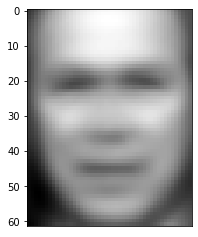

In [10]:
X_prime = np.dot(X5D,eigvec5.T)  + x_mean 

plt_face(X_prime[3])
plt.show()

### Repeating process with 50 principal components

In [11]:
top50=np.argsort(eigval)[::-1][:50]

eigvec50=eigvec[:,top50]

eigval50=eigval[top50]

X50D = np.matmul(x_centered, eigvec50)

print(x_centered.shape)

print(X50D.shape)

(1288, 2914)
(1288, 50)


In [12]:
print("Top 50 Vector:")
print()
print(eigvec50)
print()
print("Top 50 EigVal:")
print()
print(eigval50)
print()
print("Associateed 50 attributes in fourth image")
print("Indexing by",top50)
print()
print(x[3][top50])

Top 50 Vector:

[[ 0.00537343  0.01745991  0.01783969 ... -0.01448476 -0.01198281
   0.01935464]
 [ 0.00569514  0.01647563  0.01602544 ... -0.01925587 -0.01468822
   0.01878093]
 [ 0.00613803  0.01628433  0.01488798 ... -0.02812075 -0.01697667
   0.01489178]
 ...
 [ 0.01043273 -0.03319881  0.03723508 ...  0.01209354  0.00427458
  -0.02641527]
 [ 0.00883074 -0.03265479  0.03316043 ...  0.025038    0.00787595
  -0.0176419 ]
 [ 0.00740469 -0.03142723  0.03093169 ...  0.02705974  0.01588807
  -0.01339537]]

Top 50 EigVal:

[9.8932755e+08 7.9189363e+08 3.8294509e+08 3.1824362e+08 2.7124672e+08
 1.6167954e+08 1.3167277e+08 1.1241044e+08 1.0841645e+08 1.0185979e+08
 8.5835912e+07 8.0315504e+07 6.5869804e+07 5.7500484e+07 5.5955588e+07
 5.2261664e+07 4.9195788e+07 4.6876924e+07 4.4136916e+07 3.8393020e+07
 3.6920092e+07 3.5237524e+07 3.2868668e+07 3.1605390e+07 2.9228162e+07
 2.8408634e+07 2.7277910e+07 2.5714882e+07 2.4762646e+07 2.2872146e+07
 2.1040654e+07 2.0243080e+07 1.9552242e+07 1.9083

In [13]:
print("The proejction of fourth image")
print(X50D[3])

The proejction of fourth image
[-202.54204   -261.4771    -418.97388     29.398842   -39.785225
 -616.43774   -318.06598     -7.3572617 -537.8271      77.62393
  744.33984    -12.989731   413.1083     594.75183    408.67117
  -73.56008   -391.36694    435.80618   -617.1358    -311.41556
 -335.1823     452.38672   -190.78975    432.78564    181.2757
  240.39499   -296.41394    141.63605     13.804945   -89.58786
  -73.40294     34.71042   -284.48917    133.53026   -126.52859
  219.94606    123.206314   -74.72774     59.832672   -80.10542
  104.45727    190.5781     -50.276794    -2.427391    55.918697
  -56.92001    219.15698     62.836494    72.263504   -99.57483  ]


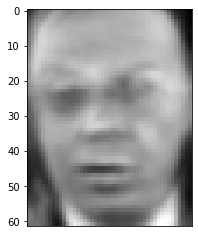

In [14]:
# project back to original images
X_prime50 = np.dot(X50D,eigvec50.T) + x_mean 
plt_face(X_prime50[3])
plt.show()